In [180]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [181]:
data_path = 'Data_Train.csv'  # Ensure this path is correct and points to your CSV file
data = pd.read_csv(data_path, encoding='cp1252')

In [182]:
print(data.head())

               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       

In [199]:
data.dropna(inplace=True)

In [200]:
label_encoder = LabelEncoder()
data['TITLE'] = label_encoder.fit_transform(data['TITLE'])
data['RESTAURANT_ID'] = label_encoder.fit_transform(data['RESTAURANT_ID'])
data['CUISINES'] = label_encoder.fit_transform(data['CUISINES'])
data['CITY'] = label_encoder.fit_transform(data['CITY'])
data['LOCALITY'] = label_encoder.fit_transform(data['LOCALITY'])

In [201]:
X = data[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'CITY', 'LOCALITY','COST']]
y = data['RATING']

In [202]:
print(X)

       TITLE  RESTAURANT_ID  CUISINES  CITY  LOCALITY  COST
0         29           6494      2485   300       267  1200
1         31           9133       279    63       963  1500
2         29           7543      2823    63      1017   800
3         93           4382      3926   206       128   800
4         48          10663      1678   206       573   300
...      ...            ...       ...   ...       ...   ...
12685     93           9156      2781   125       318   500
12686     31           6673      2034   206       125  1800
12687     69           7701      1980   223      1243  1300
12688     29           4245      3334    63       584   400
12689     29           4442      2793   125      1234   600

[11486 rows x 6 columns]


In [203]:
print(Y)

Series([], Name: userID, dtype: float64)


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [210]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11486 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11486 non-null  int64 
 1   RESTAURANT_ID  11486 non-null  int64 
 2   CUISINES       11486 non-null  int64 
 3   TIME           11486 non-null  object
 4   CITY           11486 non-null  int64 
 5   LOCALITY       11486 non-null  int64 
 6   RATING         11486 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           11486 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 897.3+ KB
None


In [211]:
print(data.describe())


              TITLE  RESTAURANT_ID      CUISINES          CITY      LOCALITY  \
count  11486.000000   11486.000000  11486.000000  11486.000000  11486.000000   
mean      57.088804    5387.772332   2124.253961    133.583754    610.372889   
std       32.264824    3111.678543   1146.815622     81.093981    371.609965   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%       29.000000    2694.250000   1124.000000     63.000000    313.000000   
50%       51.000000    5379.500000   2271.500000    125.000000    545.000000   
75%       93.000000    8096.750000   3070.000000    206.000000    933.000000   
max      110.000000   10788.000000   3945.000000    336.000000   1314.000000   

               COST  
count  11486.000000  
mean     681.896309  
std      645.571594  
min       50.000000  
25%      300.000000  
50%      500.000000  
75%      800.000000  
max    14000.000000  


C:\Users\suraj\AppData\Local\Temp\ipykernel_11240\245084140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CUISINES'])


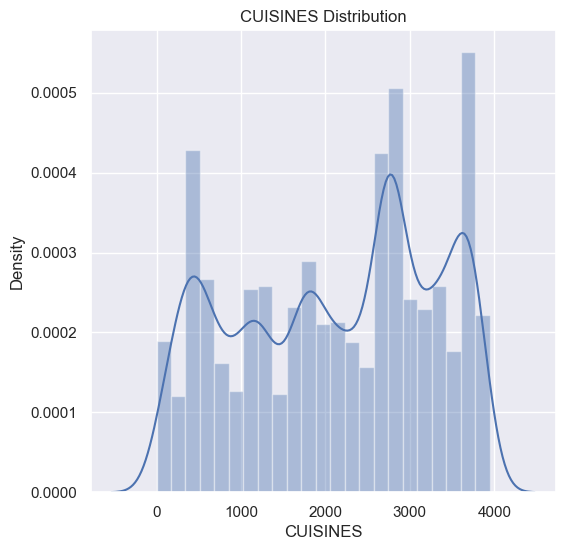

In [212]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['CUISINES'])
plt.title('CUISINES Distribution')
plt.show()

In [219]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(y_pred)




[3.81264955 4.05808345 3.6349441  ... 3.71172475 3.72443289 3.60934836]
